# Medical Diagnosis with Naive Bayes

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('Day4Disease.csv')
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Disease']=le.fit_transform(df['Disease'])
df['Fever']=le.fit_transform(df['Fever'])
df['Cough']=le.fit_transform(df['Cough'])
df['Fatigue']=le.fit_transform(df['Fatigue'])
df['Difficulty Breathing']=le.fit_transform(df['Difficulty Breathing'])
df['Blood Pressure']=le.fit_transform(df['Blood Pressure'])
df['Cholesterol Level']=le.fit_transform(df['Cholesterol Level'])
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,1,0,1,1,19,Female,1,2,Positive
1,24,0,1,1,0,25,Female,2,2,Negative
2,37,0,1,1,0,25,Female,2,2,Negative
3,6,1,1,0,1,25,Male,2,2,Positive
4,6,1,1,0,1,25,Male,2,2,Positive


In [22]:
x=df.iloc[:,:-1]
x

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
0,56,1,0,1,1,19,Female,1,2
1,24,0,1,1,0,25,Female,2,2
2,37,0,1,1,0,25,Female,2,2
3,6,1,1,0,1,25,Male,2,2
4,6,1,1,0,1,25,Male,2,2
...,...,...,...,...,...,...,...,...,...
344,101,1,0,1,0,80,Female,0,0
345,101,1,0,1,0,85,Male,0,0
346,101,1,0,1,0,85,Male,0,0
347,101,1,0,1,0,90,Female,0,0


In [23]:
y=df.iloc[:,-1:]
y

,Outcome Variable
0,Positive
1,Negative
2,Negative
3,Positive
4,Positive
...,...
344,Positive
345,Positive
346,Positive
347,Positive


In [24]:
df.isna().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

array([[<Axes: title={'center': 'Disease'}>,
        <Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Cough'}>],
       [<Axes: title={'center': 'Fatigue'}>,
        <Axes: title={'center': 'Difficulty Breathing'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Blood Pressure'}>,
        <Axes: title={'center': 'Cholesterol Level'}>, <Axes: >]],
      dtype=object)

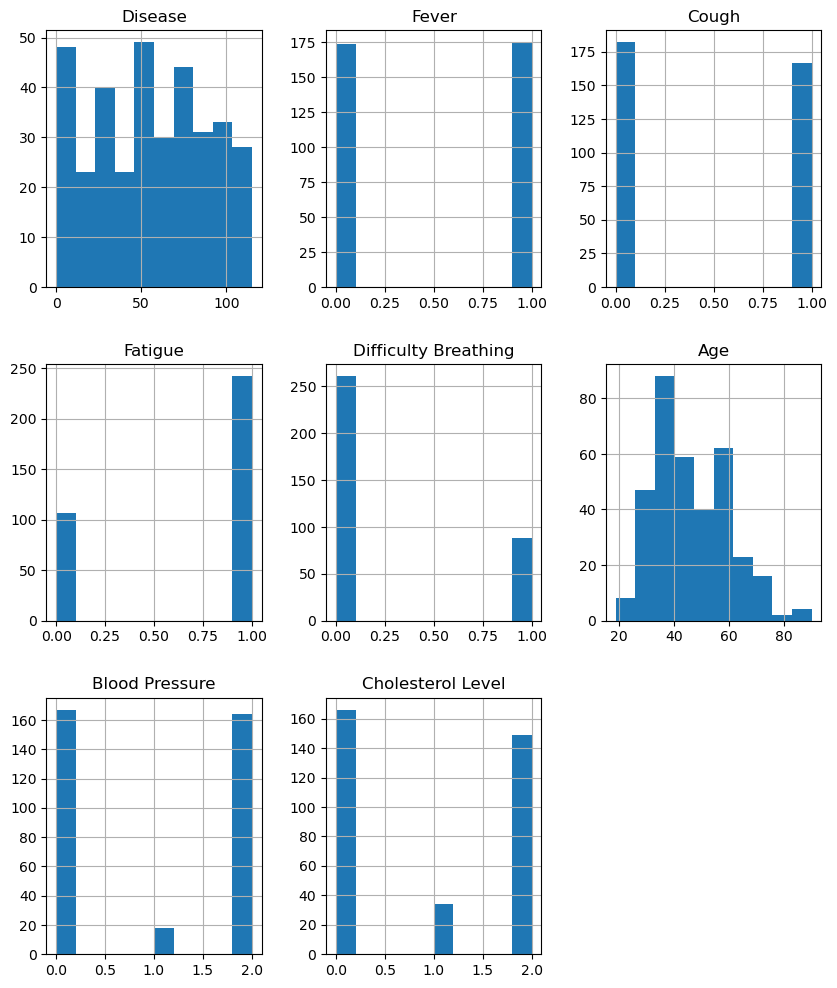

In [25]:
df.hist(figsize=(10,12))

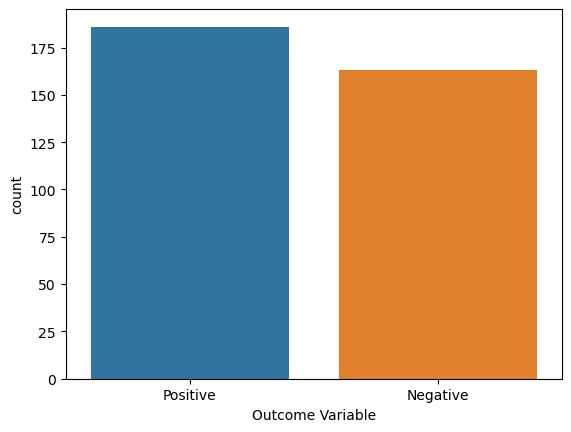

In [26]:
sns.countplot(data=df, x='Outcome Variable')
plt.show()

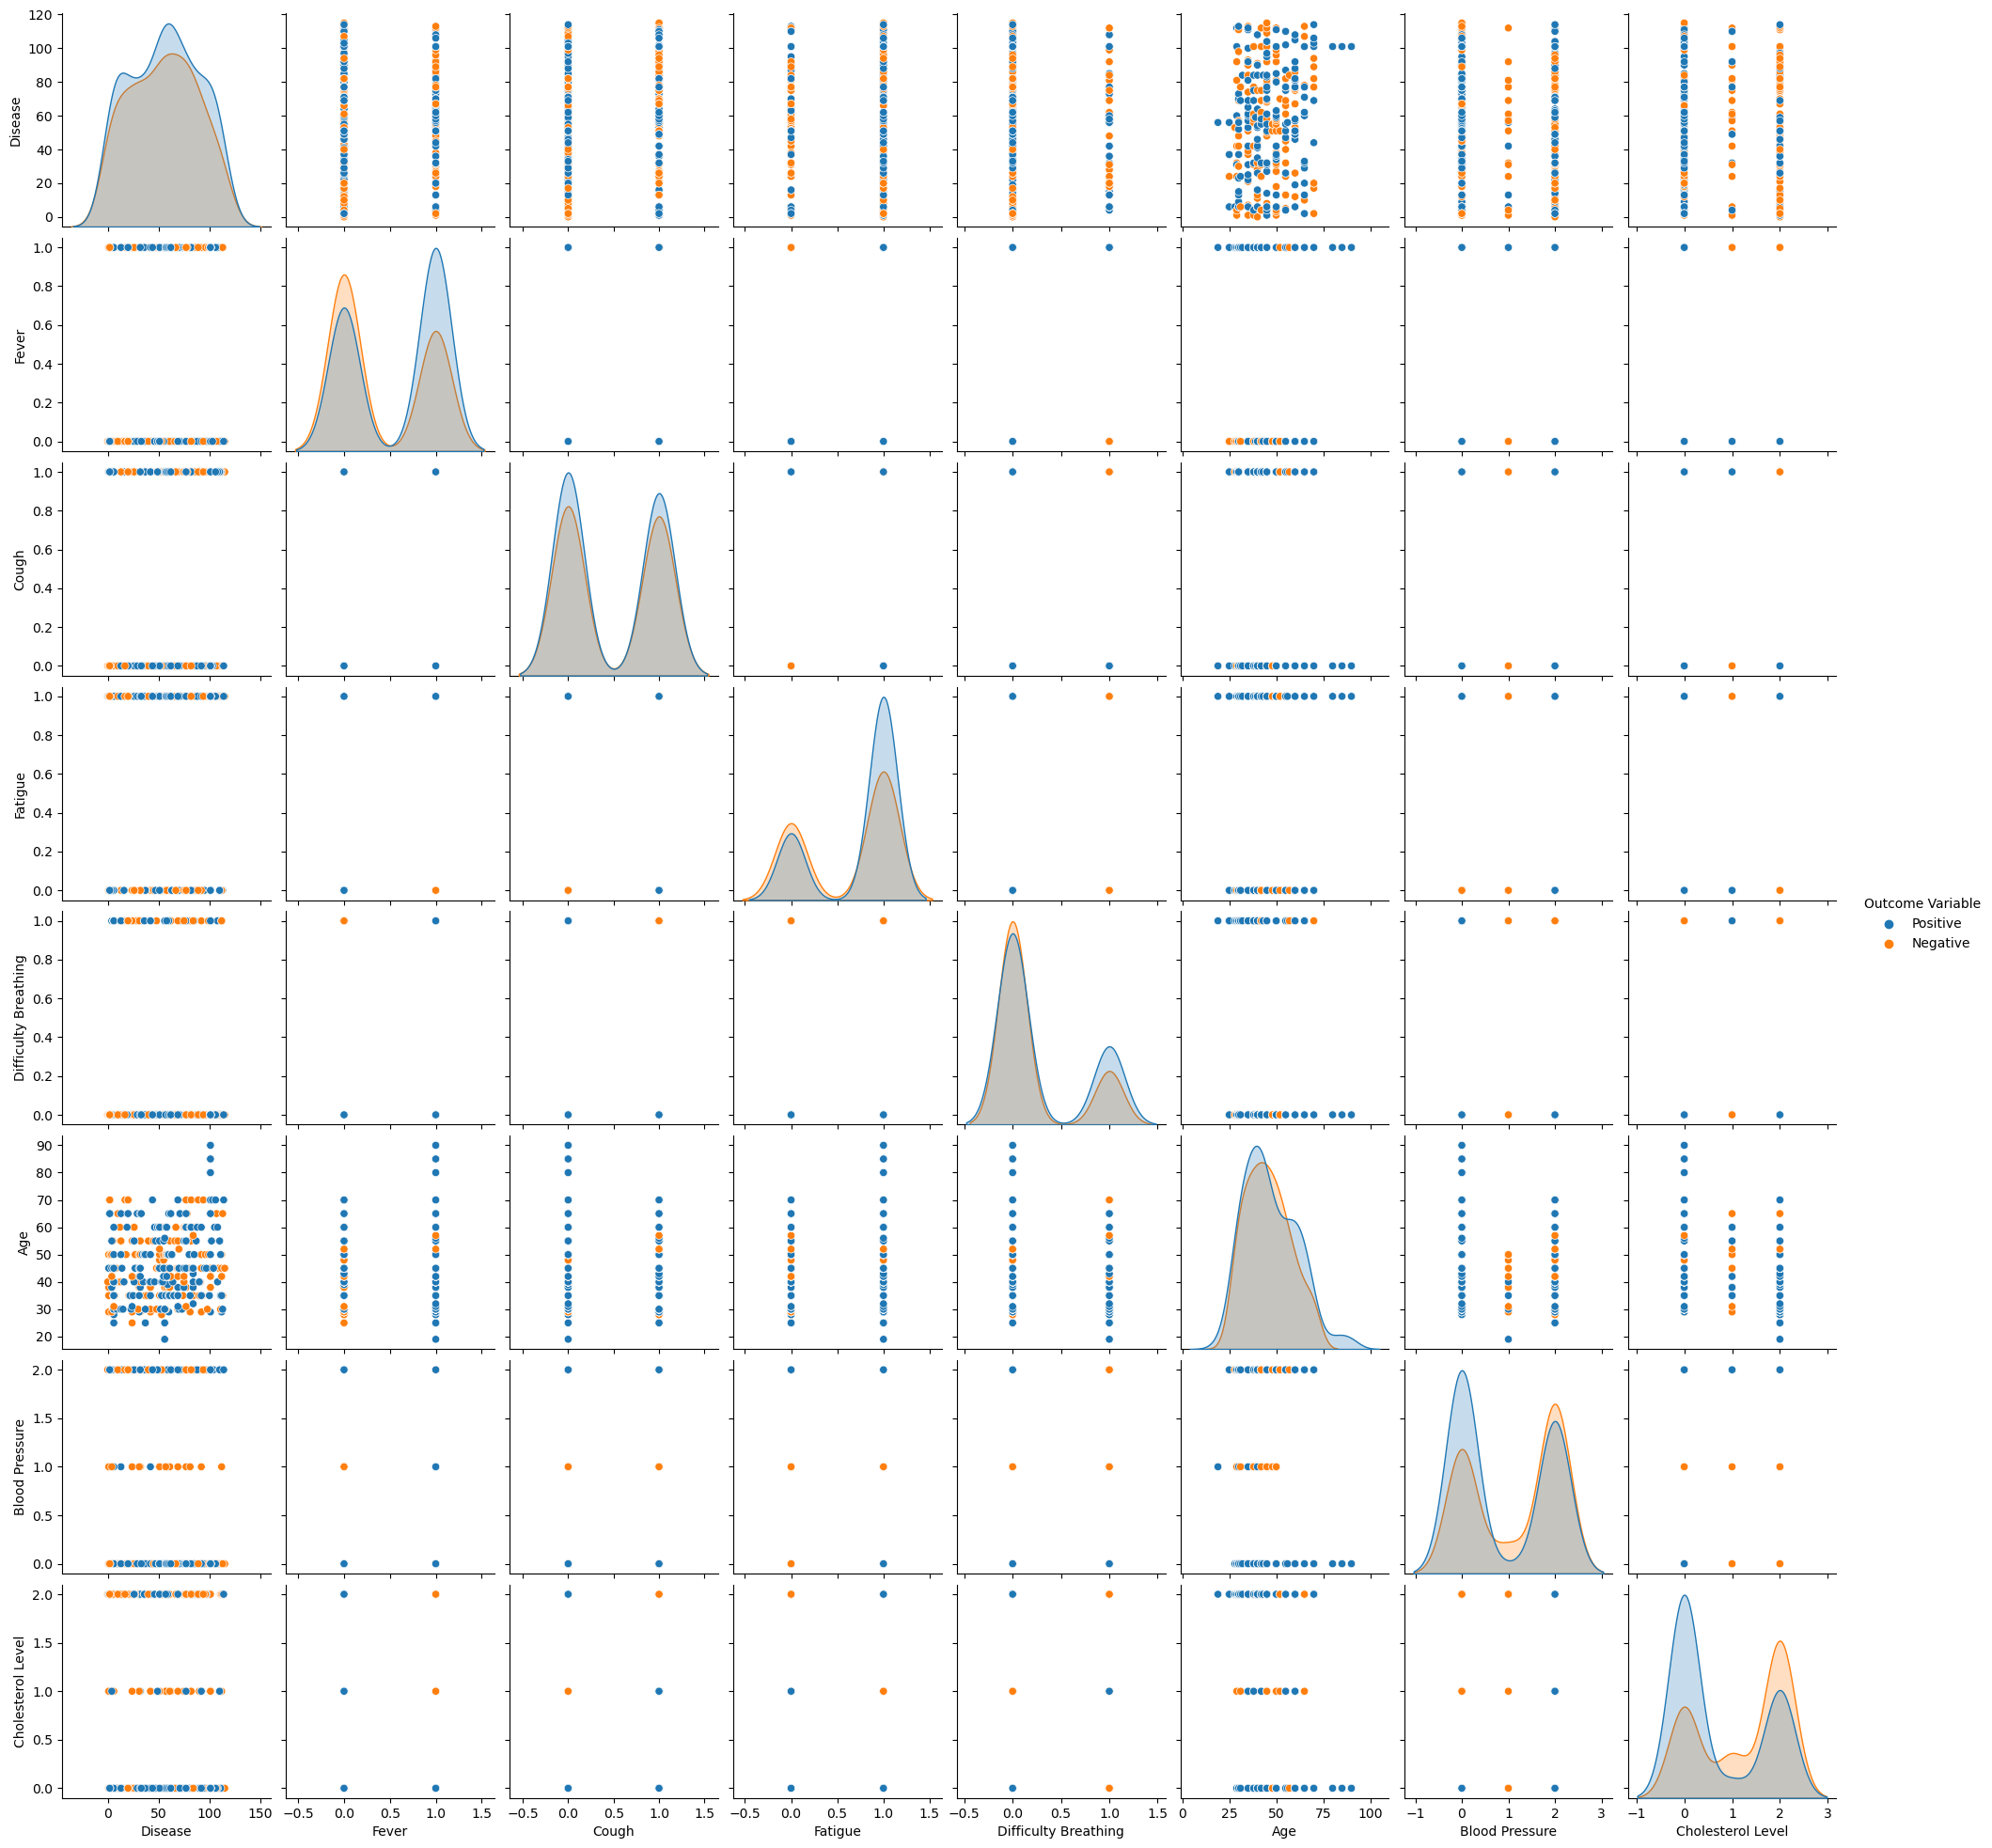

In [27]:
sns.pairplot(df,hue="Outcome Variable")

Skew:  0.08641123061901233

Kurthosis:  <bound method NDFrame._add_numeric_operations.<locals>.kurt of 0      0
1      1
2      1
3      1
4      1
      ..
344    0
345    0
346    0
347    0
348    0
Name: Cough, Length: 349, dtype: int32>


C:\Users\hp\AppData\Local\Temp\ipykernel_13172\1937367693.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Cough"])


<Axes: xlabel='Cough', ylabel='Density'>

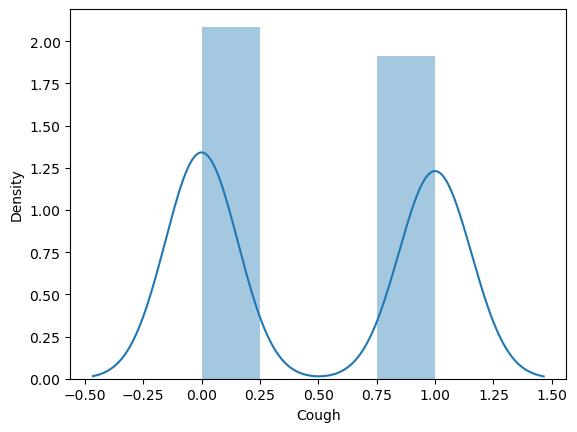

In [28]:
from scipy.stats import skew,kurtosis
print("Skew: ",df["Cough"].skew())
print()
print("Kurthosis: ",df["Cough"].kurtosis)
sns.distplot(df["Cough"])

Skew:  -0.005755449029988017

Kurthosis:  <bound method NDFrame._add_numeric_operations.<locals>.kurt of 0      1
1      0
2      0
3      1
4      1
      ..
344    1
345    1
346    1
347    1
348    1
Name: Fever, Length: 349, dtype: int32>


C:\Users\hp\AppData\Local\Temp\ipykernel_13172\4232598908.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fever"])


<Axes: xlabel='Fever', ylabel='Density'>

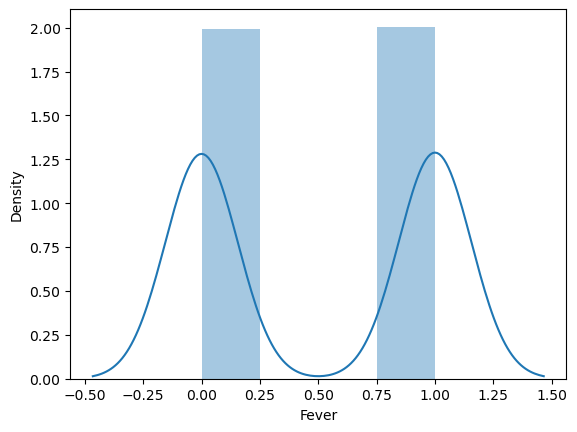

In [29]:
from scipy.stats import skew,kurtosis
print("Skew: ",df["Fever"].skew())
print()
print("Kurthosis: ",df["Fever"].kurtosis)
sns.distplot(df["Fever"])

Skew:  -0.8425720671000645

Kurthosis:  <bound method NDFrame._add_numeric_operations.<locals>.kurt of 0      1
1      1
2      1
3      0
4      0
      ..
344    1
345    1
346    1
347    1
348    1
Name: Fatigue, Length: 349, dtype: int32>


C:\Users\hp\AppData\Local\Temp\ipykernel_13172\755576299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fatigue"])


<Axes: xlabel='Fatigue', ylabel='Density'>

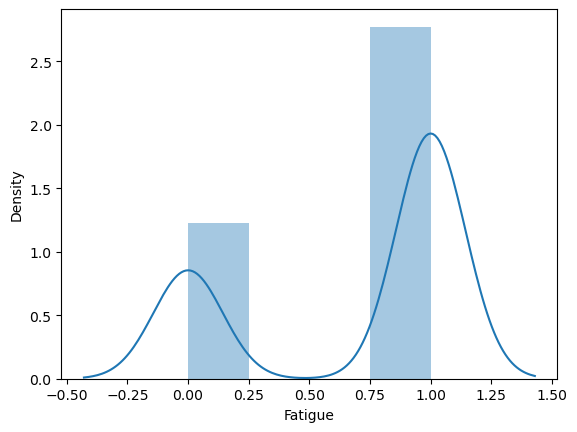

In [30]:
from scipy.stats import skew,kurtosis
print("Skew: ",df["Fatigue"].skew())
print()
print("Kurthosis: ",df["Fatigue"].kurtosis)
sns.distplot(df["Fatigue"])

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Disease,349.0,55.326648,33.205852,0.0,27.0,56.0,81.0,115.0
Fever,349.0,0.501433,0.500716,0.0,0.0,1.0,1.0,1.0
Cough,349.0,0.478510,0.500255,0.0,0.0,0.0,1.0,1.0
Fatigue,349.0,0.693410,0.461740,0.0,0.0,1.0,1.0,1.0
Difficulty Breathing,349.0,0.252149,0.434870,0.0,0.0,0.0,1.0,1.0
Age,349.0,46.323782,13.085090,19.0,35.0,45.0,55.0,90.0
Blood Pressure,349.0,0.991404,0.975231,0.0,0.0,1.0,2.0,2.0
Cholesterol Level,349.0,0.951289,0.950154,0.0,0.0,1.0,2.0,2.0


In [32]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
xtrain

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
228,36,1,1,1,1,50,Male,2,2
78,25,0,1,0,0,35,Female,0,0
90,81,0,0,1,0,35,Male,2,0
16,81,1,0,0,0,29,Female,0,2
66,53,1,1,1,0,35,Female,2,2
...,...,...,...,...,...,...,...,...,...
188,32,0,1,1,0,45,Male,2,0
71,90,0,1,1,0,35,Female,2,1
106,4,1,0,1,1,38,Male,0,0
270,110,0,1,0,0,55,Male,2,1


In [38]:
xtest

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
157,55,1,1,1,0,42,Female,0,0
341,106,1,1,1,0,70,Female,0,0
315,20,1,0,1,1,65,Female,0,0
234,63,1,0,0,0,50,Male,2,0
155,32,1,1,1,0,42,Male,0,2
...,...,...,...,...,...,...,...,...,...
94,111,0,0,1,0,35,Male,0,0
181,6,1,1,0,1,45,Male,2,2
179,1,1,1,1,0,45,Male,0,2
199,97,0,0,1,0,45,Female,2,2


In [59]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain, ytrain)

print('Training completed....')
print()

ypred=gauss_nb.predict(xtest)

print('Testing is done')

 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('-'*60)
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('-'*60)
print()     
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('-'*60)
print()     
print('Classification Report: \n',classification_report (ytest,ypred))
print('-'*60)

Training completed....

Testing is done
------------------------------------------------------------
Accuracy Score:	
 0.5571428571428572

------------------------------------------------------------

Confusion Matrix:
 [[18 12]
 [19 21]]

------------------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.49      0.60      0.54        30
    Positive       0.64      0.53      0.58        40

    accuracy                           0.56        70
   macro avg       0.56      0.56      0.56        70
weighted avg       0.57      0.56      0.56        70

------------------------------------------------------------


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
ypred

array(['Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive'],
      dtype='<U8')